# Import Libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load Titanic Dataset

In [7]:
df = pd.read_csv("Superstore.csv", encoding='ISO-8859-1')
print(df.head())

   Row ID        Order ID  Order Date   Ship Date       Ship Mode Customer ID  \
0       1  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
1       2  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
2       3  CA-2016-138688   6/12/2016   6/16/2016    Second Class    DV-13045   
3       4  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   
4       5  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   

     Customer Name    Segment        Country             City  ...  \
0      Claire Gute   Consumer  United States        Henderson  ...   
1      Claire Gute   Consumer  United States        Henderson  ...   
2  Darrin Van Huff  Corporate  United States      Los Angeles  ...   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   

  Postal Code  Region       Product ID         Category Sub-Category  \
0       42420   Sout

# Descriptive statistics

In [11]:
df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [15]:
df.shape

(9994, 21)

In [17]:
df.size

209874

In [19]:
df.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [9]:
# Top Categories
top_cat = df['Category'].value_counts()

#  Category Distribution

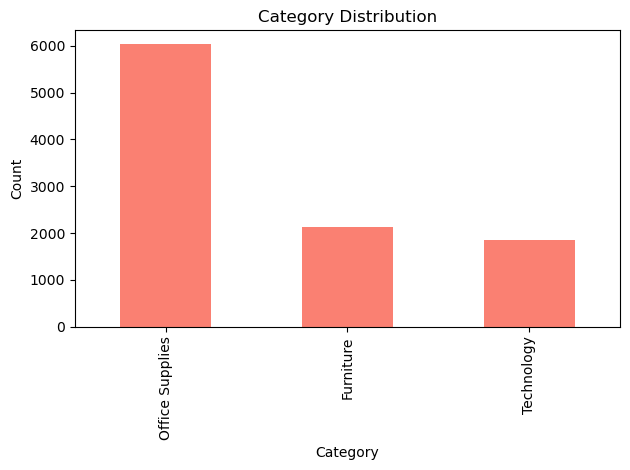

In [24]:
ttop_cat = df['Category'].value_counts()
top_cat.plot(kind='bar', color='salmon')
plt.title("Category Distribution")
plt.xlabel("Category")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


#  Total Sales by Region

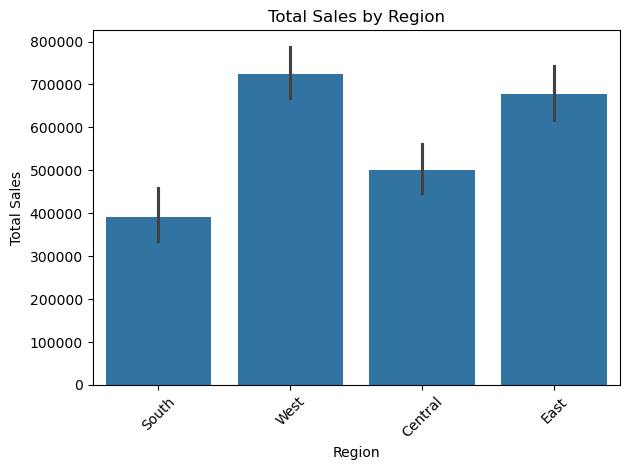

In [37]:
sns.barplot(x="Region", y="Sales", data=df, estimator=sum)
plt.title("Total Sales by Region")
plt.xlabel("Region")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#  Discount vs Profit

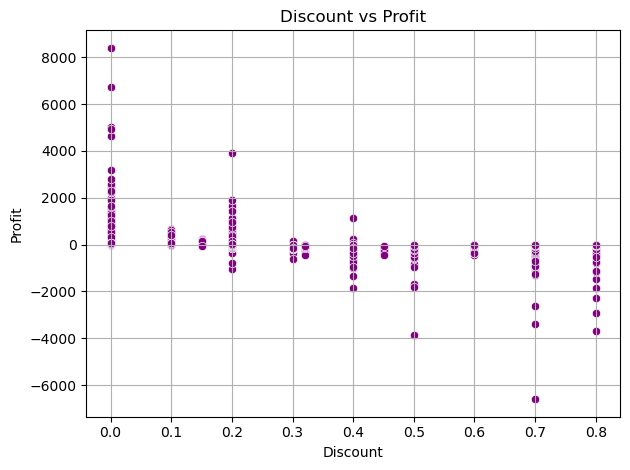

In [39]:
sns.scatterplot(x="Discount", y="Profit", data=df, color="purple")
plt.title("Discount vs Profit")
plt.xlabel("Discount")
plt.ylabel("Profit")
plt.grid(True)
plt.tight_layout()
plt.show()

# Sales by Category

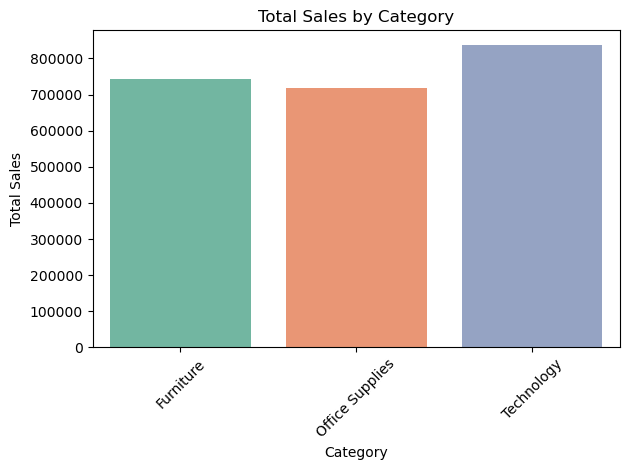

In [47]:
cat_sales = df.groupby("Category")["Sales"].sum().reset_index()
cat_sales["HueCat"] = cat_sales["Category"]  # dummy hue
sns.barplot(x="Category", y="Sales", data=cat_sales, hue="HueCat", palette="Set2", dodge=False)
plt.title("Total Sales by Category")
plt.xlabel("Category")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
legend = plt.gca().get_legend()
if legend:
    legend.remove()
plt.tight_layout()
plt.show()

# Profit by Sub-Category

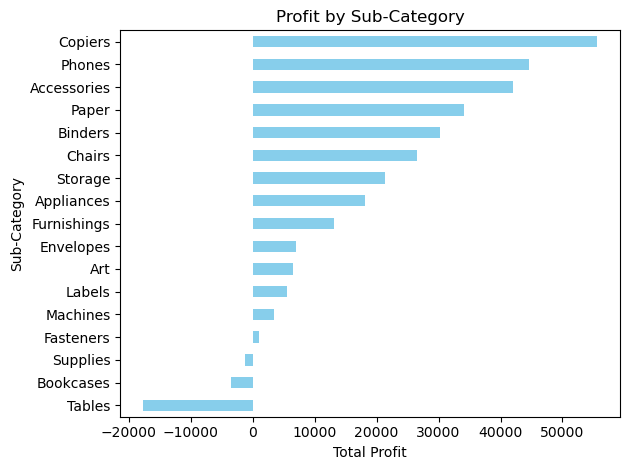

In [51]:
subcat_profit = df.groupby("Sub-Category")["Profit"].sum().sort_values()
subcat_profit.plot(kind='barh', color='skyblue')
plt.title("Profit by Sub-Category")
plt.xlabel("Total Profit")
plt.ylabel("Sub-Category")
plt.tight_layout()
plt.show()

# Pie chart

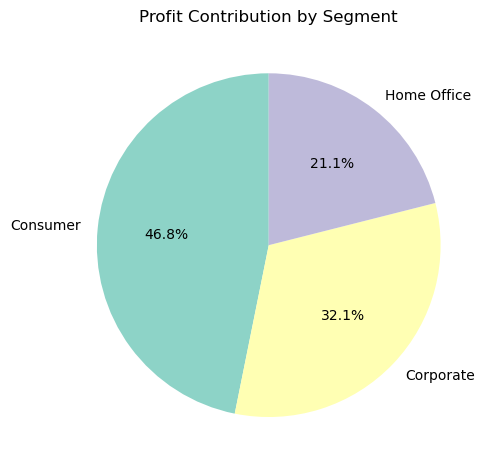

In [54]:
segment_profit = df.groupby('Segment')['Profit'].sum()
colors = sns.color_palette("Set3")
segment_profit.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=colors)
plt.title("Profit Contribution by Segment")
plt.ylabel('')  # Removes y-axis label
plt.tight_layout()
plt.show()

# Insights

- Office Supplies category had the most orders, but Technology led in revenue.

- West and East regions dominated in total sales.

- Discounts negatively impacted profits in many cases.

- Consumer segment brought in the highest overall profit.

- Furniture had lower profit margins than other categories